<a href="https://colab.research.google.com/github/rkdus5485/study/blob/master/pca_rantrain_ncomp%3D10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import os
import random

In [16]:
subject=[]
ori_subject=[]
for i in range(1,41):
  path = '/content/drive/MyDrive/att_faces/s'+str(i)
  file_list = os.listdir(path)
  for j in range(10):
    with Image.open(path+"/"+file_list[j]) as im:
      a = np.asarray(im)
      ori_subject.append(a)
      a_1=a.reshape(112*92,)
      subject.append(a_1)

subject=np.asarray(subject)
ori_subject = np.asarray(ori_subject)

In [17]:
print(subject, subject.shape)

[[ 34  34  33 ...  37  40  33]
 [ 44  43  32 ...  43  43  37]
 [ 39  44  53 ...  29  26  29]
 ...
 [128 125 125 ...  85  90  84]
 [119 120 120 ...  89  94  85]
 [123 121 126 ...  40  35  42]] (400, 10304)


In [18]:
subject[399]

array([123, 121, 126, ...,  40,  35,  42], dtype=uint8)

In [19]:
subject=[]
ori_subject=[]
for i in range(1,41):
  path = '/content/drive/MyDrive/att_faces/s'+str(i)
  file_list = os.listdir(path)
  line=[]
  line_1=[]
  for j in range(10):
    with Image.open(path+"/"+file_list[j]) as im:
      a = np.asarray(im)
      line.append(a)
      
      a_1=a.reshape(112*92,)
      line_1.append(a_1)
  ori_subject.append(line)
  subject.append(line_1)

subject=np.asarray(subject)
ori_subject = np.asarray(ori_subject)

In [20]:
subject.shape

(40, 10, 10304)

In [21]:
subject[0].shape

(10, 10304)

In [22]:
train=[]
ori_train=[]
test=[]
ori_test=[]

ran_list = []
train_index=[]

for i in range(40):
  ran_list.append(i)
test_index = random.sample(ran_list,5)

for i in range(5):
  test.append(subject[test_index[i]])
test=np.asarray(test)
test= test.reshape(5*10,10304)
ori_test = test.reshape(50,112,92)
print('test index : ', test_index)
print(test, test.shape)

for i in range(40):
  is_test=False
  for j in test_index:
    
    if i == j:
      is_test=True
      continue
  if is_test == True:
    continue
  train_index.append(i)
  train.append(subject[i])
  #print('trian index = ', i )
train=np.asarray(train)
train = train.reshape(35*10, 10304)
ori_train=train.reshape(350,112,92)
print(train, train.shape)
print('train index : ',train_index)

test index :  [1, 35, 4, 6, 10]
[[30 37 35 ... 26 27 32]
 [37 35 35 ... 26 28 28]
 [34 36 35 ... 32 25 25]
 ...
 [51 48 43 ... 29 28 32]
 [44 48 45 ... 33 36 37]
 [50 46 49 ... 33 33 41]] (50, 10304)
[[ 34  34  33 ...  37  40  33]
 [ 44  43  32 ...  43  43  37]
 [ 39  44  53 ...  29  26  29]
 ...
 [128 125 125 ...  85  90  84]
 [119 120 120 ...  89  94  85]
 [123 121 126 ...  40  35  42]] (350, 10304)
train index :  [0, 2, 3, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39]


In [23]:
print(train, train.shape)

[[ 34  34  33 ...  37  40  33]
 [ 44  43  32 ...  43  43  37]
 [ 39  44  53 ...  29  26  29]
 ...
 [128 125 125 ...  85  90  84]
 [119 120 120 ...  89  94  85]
 [123 121 126 ...  40  35  42]] (350, 10304)


In [24]:
print(ori_train, ori_train.shape)

[[[ 34  34  33 ...   1   1   1]
  [ 35  30  32 ...  38  47  39]
  [ 34  28  31 ...  55  59  49]
  ...
  [ 30  29  31 ...  35  37  41]
  [ 31  29  32 ...  42  34  39]
  [ 28  33  27 ...  37  40  33]]

 [[ 44  43  32 ...  52  48  52]
  [ 44  38  33 ...  51  51  54]
  [ 41  42  29 ...  50  53  53]
  ...
  [ 39  37  39 ...  41  37  37]
  [ 41  41  38 ...  44  36  32]
  [ 40  36  42 ...  43  43  37]]

 [[ 39  44  53 ...  47  48  47]
  [ 44  44  61 ...  47  45  46]
  [ 59  39  57 ...  46  46  44]
  ...
  [ 49  46  42 ...  30  32  28]
  [ 46  35  34 ...  30  29  27]
  [ 32  37  27 ...  29  26  29]]

 ...

 [[128 125 125 ... 121 122 121]
  [129 127 128 ... 125 121 125]
  [126 126 131 ... 124 124 125]
  ...
  [ 71  65  90 ...  90  86  90]
  [ 72  75  99 ...  86  88  91]
  [ 63  87 100 ...  85  90  84]]

 [[119 120 120 ... 129 128 124]
  [118 121 120 ... 126 124 127]
  [120 119 118 ... 121 128 127]
  ...
  [ 64  61  64 ...  89  92  88]
  [ 64  63  58 ...  93  90  92]
  [ 65  61  63 ...  89  94  

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=3)

In [27]:
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
test_reduced = pca.fit_transform(test)
test_reduced.shape

(50, 3)

In [29]:
test_reduced

array([[  511.90010155,  -916.41990129,  2369.76383654],
       [  189.76402529, -1102.25352192,  2050.94209241],
       [  125.81165317, -1164.04842356,  1994.1033293 ],
       [ 1047.51312504,  -943.62663394,  2106.34226402],
       [  432.4015434 ,  -785.41435775,  1926.1115888 ],
       [  349.9026071 ,  -514.34442426,  2276.96533375],
       [  182.76787943, -1373.30576636,  1452.02359181],
       [  667.03715705,  -906.81050919,  2447.9275078 ],
       [  410.96787735, -1905.76505   ,  1355.84380705],
       [ 1143.23653075,  -777.44664754,  2286.11097836],
       [-1274.19033975,  2563.21170174,   370.57518424],
       [  149.27393818,  2651.88209491,   260.63566312],
       [ -813.93833089,  1155.60012878,   193.03766895],
       [ -329.04214226,   516.92131869,   389.08264421],
       [ -372.32848119,   733.9642629 ,   -14.7032382 ],
       [ -629.6206018 ,   183.29205743,    36.27215953],
       [-1240.04533672,  2119.3302094 ,   115.3252343 ],
       [ -544.7059051 ,   902.5

In [30]:
test_recovered = pca.inverse_transform(test_reduced)

In [31]:
test_recovered

array([[30.20846008, 30.22691569, 30.34693885, ..., 85.31195995,
        87.85484343, 86.19264247],
       [30.14903433, 30.03417781, 30.1448812 , ..., 79.12946621,
        81.52200658, 80.33659972],
       [29.99293314, 29.85334045, 29.94971949, ..., 77.87516122,
        80.24815503, 79.16910278],
       ...,
       [42.76067851, 41.95149267, 41.69848322, ..., 44.1819738 ,
        45.35863198, 47.55329632],
       [56.50609394, 55.63112855, 55.0015178 , ..., 37.89470058,
        38.54351957, 41.99186528],
       [47.66261567, 46.51099754, 46.17874137, ..., 27.80806101,
        28.41450973, 32.06691056]])

In [32]:
test_recovered.shape

(50, 10304)

In [33]:
test_eigen = test_recovered.reshape((50,112,92),)

In [34]:
test_eigen

array([[[ 30.20846008,  30.22691569,  30.34693885, ...,  29.64992813,
          27.77098353,  30.14355409],
        [ 29.57268093,  30.32914703,  31.23850719, ...,  30.42473294,
          28.50238961,  30.43637455],
        [ 31.5574466 ,  30.92594885,  30.66372898, ...,  28.82235834,
          31.101789  ,  28.95557594],
        ...,
        [ 33.97004728,  36.38763933,  39.84760976, ...,  40.06651042,
          38.56644297,  36.93286464],
        [ 28.43735309,  41.03375756,  38.82126814, ...,  58.50269694,
          56.82131863,  53.74443804],
        [ 33.29801775,  36.55401304,  33.6488287 , ...,  85.31195995,
          87.85484343,  86.19264247]],

       [[ 30.14903433,  30.03417781,  30.1448812 , ...,  28.76279164,
          26.98545068,  29.06964584],
        [ 29.4769377 ,  30.16951136,  31.15142816, ...,  29.37889957,
          27.75661193,  29.36460629],
        [ 31.37304779,  30.59698634,  30.800218  , ...,  27.99660413,
          30.02608605,  28.04506773],
        ...,


In [35]:
test_eigen.shape

(50, 112, 92)

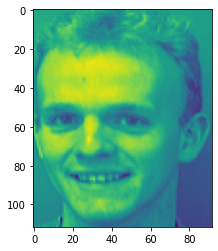

In [36]:
plt.imshow(ori_test[20])

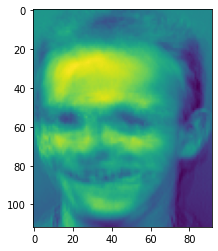

In [37]:
plt.imshow(test_eigen[20])

In [38]:
class PrincipalComponentAnalysis():

    
    def __init__(self, n_components):
        #n_components : 데이터를 축소시킬 목표 차원
        self.n_components = n_components
        
        self.eigen_mat = None
        
        self.eigen_val = None

        self.reduced_eigen_mat = None
        
    def fit(self, x):
        # data를 zero centered
        x = x - np.mean(x, axis=0, keepdims=True)
        
        n, d = x.shape
        
        cov = np.matmul(x.T, x)/n
        
        eigvals, eigvecs = np.linalg.eig(cov)
        
        eig_pairs = [(eigvals[i], eigvecs[:, i]) for i in range(d)]
        
        sorted_eig = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)
        
        self.eigen_mat = np.stack(list(map(lambda tup: tup[1], sorted_eig)), axis=1)
        
        self.eigen_val = np.array(list(map(lambda tup: tup[0], sorted_eig)))
        
    def transform(self, x):
        
        x = x - np.mean(x, axis=0, keepdims=True)
        
        if self.eigen_mat is None:
            print("You should fit model first!")
            return
        
        
        self.reduced_eigen_mat = self.eigen_mat[:, :self.n_components]
        
        
        results = np.matmul(x, self.reduced_eigen_mat)
        
        return results
    def reconstruct(self, data, x_transformed) :
        y = np.matmul(x_transformed, self.reduced_eigen_mat.T)+np.mean(data, axis=0, keepdims=True)
        y = y.reshape(y.shape[0],112,92)

        return y

In [39]:
pca = PrincipalComponentAnalysis(n_components=10)

In [40]:
pca.fit(train)

In [41]:
test_transformed = pca.transform(test)
test_transformed

array([[ 7.93004743e+02+0.j,  1.00548086e+03+0.j, -5.98919834e+02+0.j,
         8.59078602e+01+0.j,  7.04505858e+01+0.j, -2.93038797e+02+0.j,
         1.93514314e+02+0.j, -1.43188699e+02+0.j, -2.71163048e+02+0.j,
        -4.86429013e+02+0.j],
       [ 5.37681019e+02+0.j,  8.32297252e+02+0.j, -9.89757173e+02+0.j,
         1.48473667e+02+0.j, -2.17203389e+02+0.j, -2.13402425e+02+0.j,
         1.28329305e+02+0.j, -5.30717330e+02+0.j, -1.72379542e+02+0.j,
        -3.24279484e+02+0.j],
       [ 4.95502833e+02+0.j,  1.00981515e+03+0.j, -9.23550871e+02+0.j,
         9.93085645e+01+0.j, -1.86339966e+02+0.j, -2.67081461e+02+0.j,
         1.81558501e+02+0.j, -6.11781110e+02+0.j, -3.23376136e+02+0.j,
        -2.79125007e+02+0.j],
       [ 1.06951856e+03+0.j,  9.89467180e+02+0.j, -4.07068903e+02+0.j,
        -3.43074953e+02+0.j, -3.18588920e+02+0.j,  1.57419765e+01+0.j,
         1.32676392e+02+0.j, -1.26730841e+02+0.j, -5.47495302e+02+0.j,
        -5.21443541e+02+0.j],
       [ 6.69410218e+02+0.j,

In [42]:
test_transformed.shape

(50, 10)

In [50]:
pca.reduced_eigen_mat

array([[-0.00297366+0.j, -0.01529881+0.j,  0.01892478+0.j, ...,
        -0.00371522+0.j,  0.00196516+0.j,  0.00831637+0.j],
       [-0.00296561+0.j, -0.01523309+0.j,  0.01892572+0.j, ...,
        -0.00376009+0.j,  0.00183881+0.j,  0.00790805+0.j],
       [-0.00295577+0.j, -0.01521713+0.j,  0.01886771+0.j, ...,
        -0.00386582+0.j,  0.00185968+0.j,  0.00832372+0.j],
       ...,
       [-0.00777331+0.j,  0.01194035+0.j,  0.00953791+0.j, ...,
         0.01889214+0.j,  0.02446184+0.j,  0.00759997+0.j],
       [-0.00715107+0.j,  0.0109934 +0.j,  0.01063013+0.j, ...,
         0.01711701+0.j,  0.0247271 +0.j,  0.00866425+0.j],
       [-0.00821532+0.j,  0.01008399+0.j,  0.01121944+0.j, ...,
         0.01612404+0.j,  0.02253338+0.j,  0.00827635+0.j]])

In [51]:
pca.reduced_eigen_mat.shape

(10304, 10)

In [58]:
print(test_reconstruct, test_reconstruct.shape)

[[[ 29.66625178+0.j  29.13579361+0.j  29.43906173+0.j ...
    30.01924972+0.j  28.6203832 +0.j  30.24811292+0.j]
  [ 29.91476627+0.j  29.79787168+0.j  30.40908104+0.j ...
    30.43370512+0.j  29.98498111+0.j  30.57567056+0.j]
  [ 30.74108559+0.j  29.62331388+0.j  30.45608686+0.j ...
    30.09682589+0.j  30.94203526+0.j  30.69478586+0.j]
  ...
  [ 29.16965688+0.j  34.37601407+0.j  36.83649162+0.j ...
    31.01460811+0.j  30.01196373+0.j  31.96289642+0.j]
  [ 36.63301263+0.j  39.00468883+0.j  40.4063687 +0.j ...
    34.90819227+0.j  33.74616683+0.j  34.31529646+0.j]
  [ 39.12582938+0.j  44.69848106+0.j  43.60766019+0.j ...
    43.43712251+0.j  42.68082111+0.j  42.44834814+0.j]]

 [[ 31.35900572+0.j  30.80392734+0.j  31.27189098+0.j ...
    28.73451283+0.j  27.45142823+0.j  29.019453  +0.j]
  [ 31.6151963 +0.j  31.7220317 +0.j  32.00409052+0.j ...
    28.97586869+0.j  28.56785569+0.j  29.24783021+0.j]
  [ 32.29468189+0.j  31.49425642+0.j  32.28620518+0.j ...
    28.99191706+0.j  29.608173

In [59]:
print('test_reconstruct.shape : ',test_reconstruct.shape)
print('test_shape : ', ori_test.shape)

test_reconstruct.shape :  (50, 112, 92)
test_shape :  (50, 112, 92)


In [61]:
re_test_reconstruct = test_reconstruct.reshape(5,10,112,92)
print(re_test_reconstruct, re_test_reconstruct.shape)

[[[[ 29.66625178+0.j  29.13579361+0.j  29.43906173+0.j ...
     30.01924972+0.j  28.6203832 +0.j  30.24811292+0.j]
   [ 29.91476627+0.j  29.79787168+0.j  30.40908104+0.j ...
     30.43370512+0.j  29.98498111+0.j  30.57567056+0.j]
   [ 30.74108559+0.j  29.62331388+0.j  30.45608686+0.j ...
     30.09682589+0.j  30.94203526+0.j  30.69478586+0.j]
   ...
   [ 29.16965688+0.j  34.37601407+0.j  36.83649162+0.j ...
     31.01460811+0.j  30.01196373+0.j  31.96289642+0.j]
   [ 36.63301263+0.j  39.00468883+0.j  40.4063687 +0.j ...
     34.90819227+0.j  33.74616683+0.j  34.31529646+0.j]
   [ 39.12582938+0.j  44.69848106+0.j  43.60766019+0.j ...
     43.43712251+0.j  42.68082111+0.j  42.44834814+0.j]]

  [[ 31.35900572+0.j  30.80392734+0.j  31.27189098+0.j ...
     28.73451283+0.j  27.45142823+0.j  29.019453  +0.j]
   [ 31.6151963 +0.j  31.7220317 +0.j  32.00409052+0.j ...
     28.97586869+0.j  28.56785569+0.j  29.24783021+0.j]
   [ 32.29468189+0.j  31.49425642+0.j  32.28620518+0.j ...
     28.9919

In [ ]:
for i in range(5):
  for j in range(10):
    

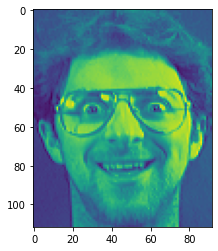

In [48]:
plt.imshow(ori_test[36].astype(np.float32))

In [ ]:
plt.imshow(test_reconstruct[36].astype(np.float32))

In [ ]:
# n_components = 2
plt.scatter(test_transformed[:,0],test_transformed[:,1])

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
x = test_transformed[:,0]
y = test_transformed[:,1]
z = test_transformed[:,2]
ax.scatter(x,y,z)
plt.show()

In [ ]:
ori_test.reshape(50,112,92)[1]

In [ ]:
test_reconstruct[1]

In [ ]:
ori_test.shape

In [ ]:
fig, axes = plt.subplots(5,10)
for i in range(51):
  for image, ax in zip(ori_test.astype(np.float32),axes.ravel()):
    ax.imshow(image)

plt.show()

In [ ]:
fig, axes = plt.subplots(5,10)
for i in range(51):
  for image, ax in zip(test_reconstruct.astype(np.float32),axes.ravel()):
    ax.imshow(image)

plt.show()